**Introduction:**

Here I have a dataset and it is based on the 
“Statlog Dataset” from 
the UCI Machine Learning Repository. The main aim 
of this project 
is to find the credit worthiness of the customers.
Creditworthiness helps the lender determine that you will default on your debt obligations, or how worthy are you to receive new credit.Creditworthiness is what they look at when they are to decide to give you new credits.In this data set we have 1000 records and 10 columns.  In this dataset, each entry represents a person who takes a credit by a bank.
Here we have features of our dataset.

**Features:**

*  Age (numeric)
*  Sex (text: male, female)


*  Job (numeric: 0 - unskilled and non-resident, 1 - unskilled    and resident, 2 - skilled, 3 - highly skilled)

*   Housing (text: own, rent, or free)

*   Saving accounts (text - little, moderate, quite rich, rich)
*   Checking account (text - little, moderate, rich)


*   Credit amount (numeric, in Deutsche Mark)

*   Duration (numeric, in month)

*  Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others








Importing some important libraries for visualization

In [290]:
# importing os module it provides functions for creating and removing a directory (folder), fetching its contents,
# changing and identifying the current directory, etc
import os 
import numpy as np # importing numpy as required for pandas
import pandas as pd # importing pandas
import matplotlib.pyplot as plt # importing matplotlib for visualization
import seaborn as sns # importing seaborn for visualization
from matplotlib import rcParams # import rcParams library


Loading the dataset  by using pandas





In [291]:
data = pd.read_csv('/content/EDA_week_1_mandatory_german_Credit.csv') # loading our dataset named german credit
data.head() # Displaying first 5 lines of the dataset


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


1. Perform basic exploration of data.


**Basic Exploration of the dataset:**




*   The first phase of this project is to see what 
is our data made about or Information about the dataset
*   Shape of the dataset(To know number of rows and columns)
*   Which variables are numerical or categorical, If needed we have to change the datatypes also.
*   Removing unnecessary columns
*   Renaming columns for better understanding of the data
*   Statistical summary of the dataset.





  



 



The first thing we will check is the size of our dataset. We can use info() to get the number of entries of each column.

In [225]:
data.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


By looking at the above information got to know that 'Job' is type int. So here I'm taking that 'Job' as a  categorical data. So it should be type object thas' the reason I'm  converting the integer to object by using astype()

In [226]:
data['Job'] = data['Job'].astype(str) # Covnerting the data type int to Object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   object
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Now, here we can also check the shape of the database to get the number of rows and columns.

In [227]:
data.shape # to get number of rows and columns in the dataset

(1000, 10)

Data types of the columns and removing unnecessary columns from the dataset.

In [298]:
numerical = ['Credit amount','Age','Duration'] # These are the numerical features of the dataset
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose'] # These are the categorical features of the dataset
unused = ['Unnamed: 0'] # This is the unused column from the dataset

data = data.drop(columns = unused) # Here I removed the unused column
data.shape # now we can get the number of columns and rows of the dataset

(1000, 9)

In the above code I removed the unused colum named as 'Unnamed'. Now I have only 9 columns.

Here I'm renaming the columns by removing spaces for better understanding

In [299]:
# Renaming the columns for proper understanding
data = data.rename(columns = {'Credit amount':'Credit_amount', 'Saving accounts':
                              'Saving_accounts', 'Checking account':'Checking_account'})
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


Describe works for the whole dataframe and single columns as well. Pandas knows which values are numerical based on the datatype and hides the categorical features.

In [229]:
data.describe() # statistical summary of the dataset

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


2. Perform exploratory data analysis and provide key insights derived from the same, backed with suitable graphs and plots. Perform univariate, bivariate and multivariate analysis.

**Exploratory Data Analysis :**

Analysing the amount of missing data

In [300]:
data.isnull()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,True,False,False,False
998,False,False,False,False,False,False,False,False,False


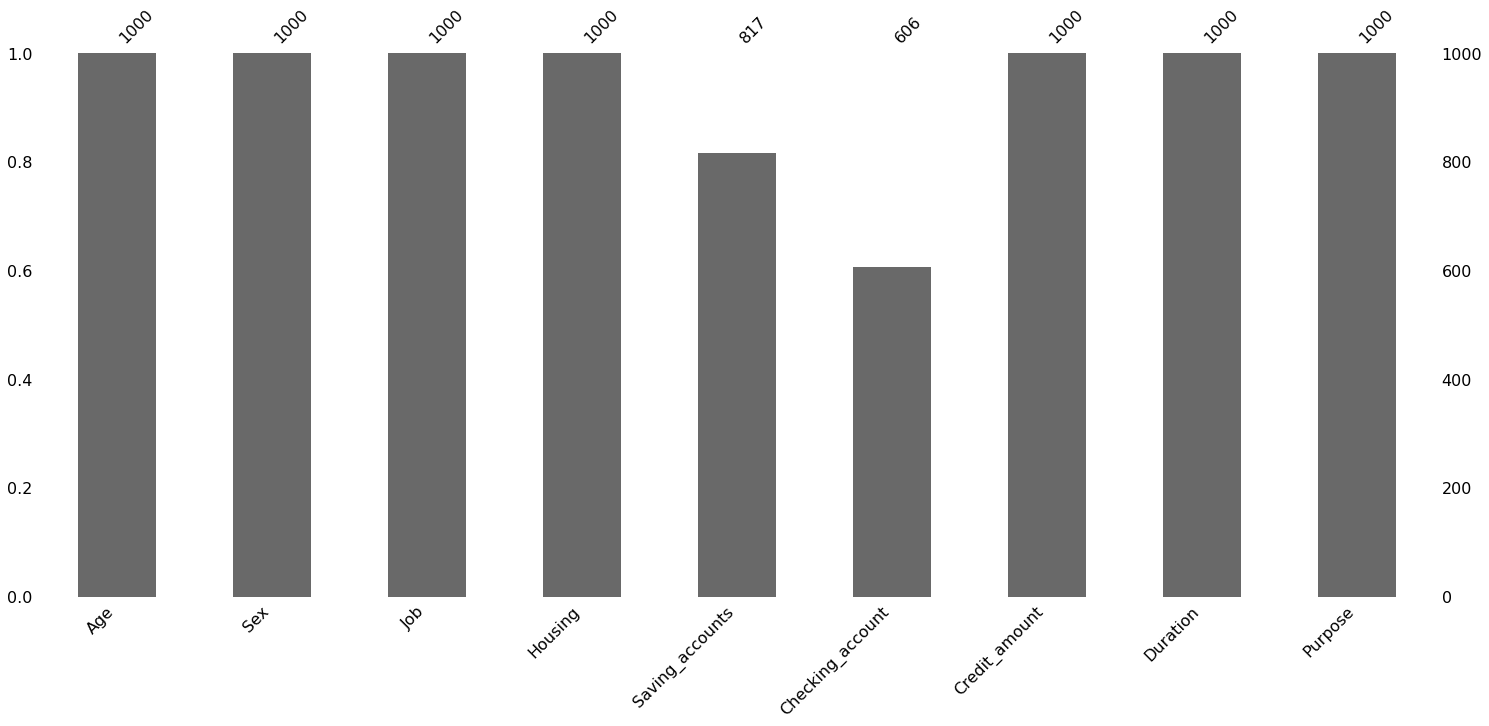

In [303]:
import missingno as msno # importing missingno for exploratory visualization of missing data.
msno.bar(data)

By looking at the above graph Saving_accounts and Checking_account
have missing values

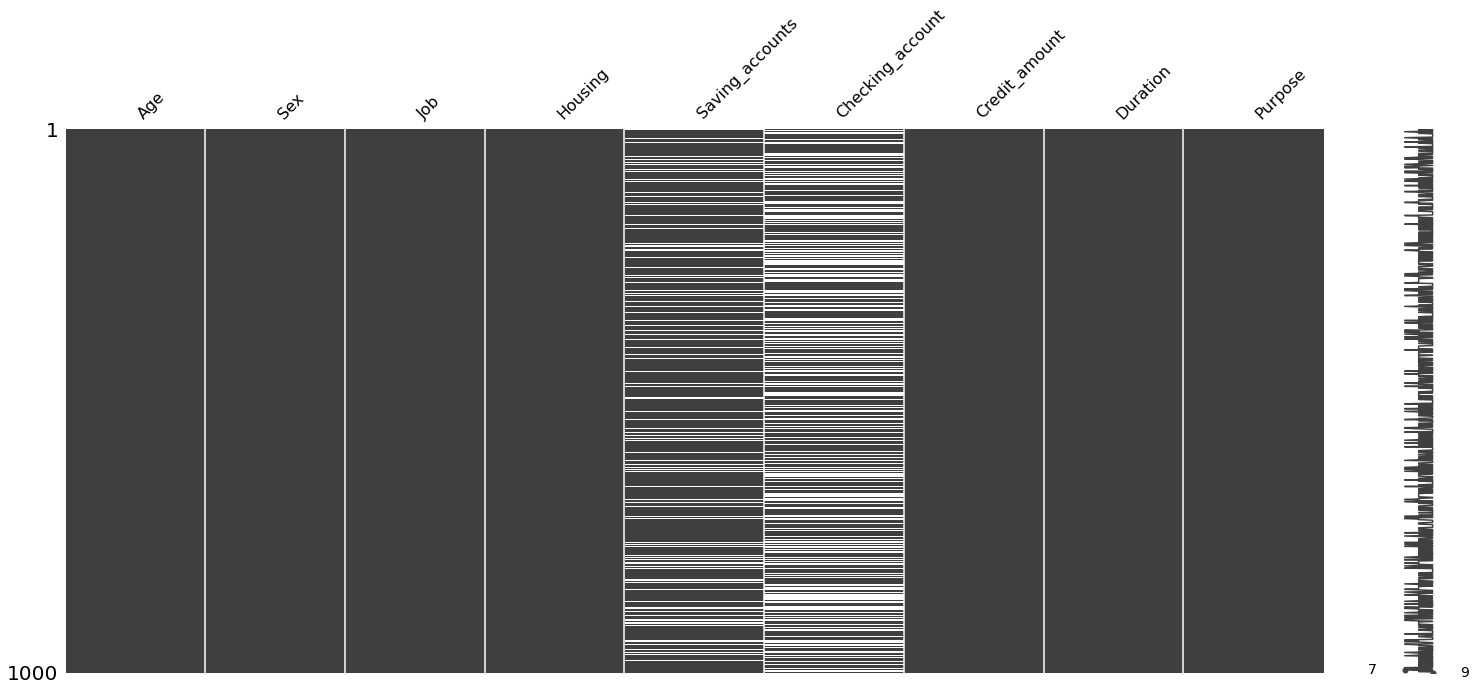

In [302]:
msno.matrix(data) # nullity matrix to know null values

Missing values will be blank

Spart line on the right summarizes the geneal shape 
of tje data pf completeness and points out the
row the minimal number of null values and total count
of the columns at the bottom.

In [231]:
#finding out unique variables
print("Purpose : ",data.Purpose.unique())
print("Sex : ",data.Sex.unique())
print("Housing : ",data.Housing.unique())
print("Saving accounts : ",data.Saving_accounts.unique())
print("Checking account : ",data.Checking_account.unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' nan 'rich']


Total missing values

In [232]:
data.isnull().sum() # finding the count of null values in each column

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

Here I have missing values in categorical columns those are Saving_accounts, Checking_account. So here I'm replacing those null values with mode().

In [308]:
# Replacing null values with mode().
# categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
# This below code also to fill the na values with mode() but because of google colab error it is not working so i tried it in another way

#  for cat in categorical:
#   data[cat] = data[cat].fillna(data[cat].mode().values[0])
# data.isna().sum() 

data['Saving_accounts'] = data['Saving_accounts'].fillna(data['Saving_accounts'].mode().values[0]) # To fill the null values with mode value
data['Checking_account'] = data['Checking_account'].fillna(data['Checking_account'].mode().values[0]) # To fill the null values with mode value
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving_accounts     0
Checking_account    0
Credit_amount       0
Duration            0
Purpose             0
dtype: int64

**Univariate Plotting**

**Numerical columns:**

Let's start by visualizing the distribution of the data. We can achieve this with a simple method called histogram by passing our columns of data

Skewness: 1.020739


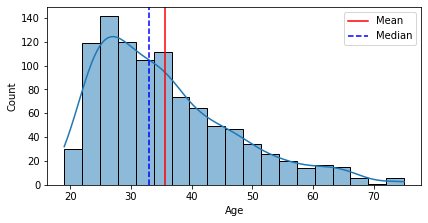

In [316]:
sns.histplot(data=data['Age'], kde=True) # Distribution of the column Age
plt.axvline(x=data.Age.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=data.Age.median(),c='blue',ls='--',label='Median') # To show the Median
plt.legend()
print("Skewness: %f" % data['Age'].skew())

By looking at the above graph and skewness value it is posively skewed.

Skewness: 1.949628


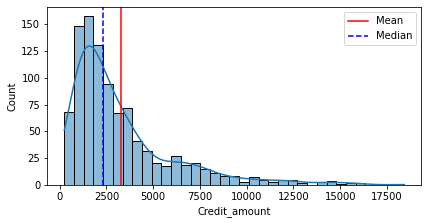

In [318]:
sns.histplot(data=data['Credit_amount'], kde=True) # Distribution of the column Credit_amount.
plt.axvline(x=data.Credit_amount.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=data.Credit_amount.median(),c='blue',ls='--',label='Median') # To show the median
plt.legend()
print("Skewness: %f" % data['Credit_amount'].skew())

By looking at the above graph and skewness value it is posively skewed.

Skewness: 1.094184


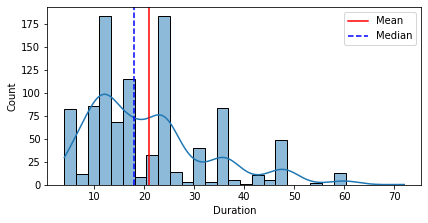

In [319]:
sns.histplot(data=data['Duration'], kde=True) # Distribution of the column Duration
plt.axvline(x=data.Duration.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=data.Duration.median(),c='blue',ls='--',label='Median') # To show the median
plt.legend()
print("Skewness: %f" % data['Duration'].skew())

By looking at the above graph and skewness value it is posively skewed.

**Categorical Columns:**

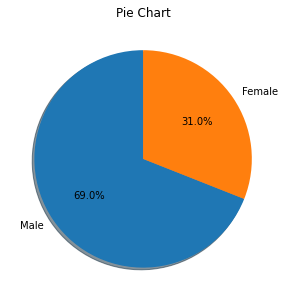

male      690
female    310
Name: Sex, dtype: int64


In [324]:
# categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
# Counting total numbers in each category
count = data['Sex'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
sex = ['Male', 'Female']
# Creating plot
fig = plt.figure(figsize =(8, 5))
# Show plot
plt.pie(count, labels = sex, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Pie Chart")
plt.show()
print(data['Sex'].value_counts())

There are 2x more males than females in our dataset

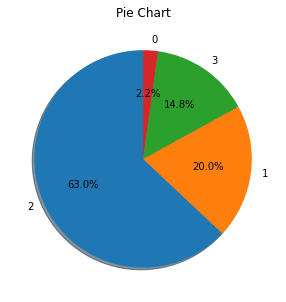

2    630
1    200
3    148
0     22
Name: Job, dtype: int64


In [329]:
# Counting total numbers in each category
count = data['Job'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
skills = ['2', '1', '3','0']
# Creating plot
fig = plt.figure(figsize =(8, 5))
# Show plot
plt.pie(count, labels = skills, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Pie Chart")
plt.show()
print(count)

Most people that applied for a credit loan have two jobs!

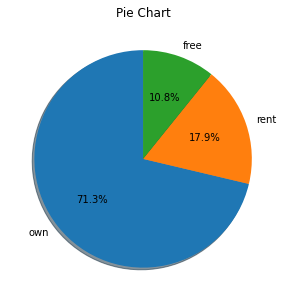

own     713
rent    179
free    108
Name: Housing, dtype: int64


In [330]:
# Counting total numbers in each category
count = data['Housing'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
skills = ['own', 'rent', 'free']
# Creating plot
fig = plt.figure(figsize =(8, 5))
# Show plot
plt.pie(count, labels = skills, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Pie Chart")
plt.show()
print(count)

Most people that applied for a credit loan have Own house.

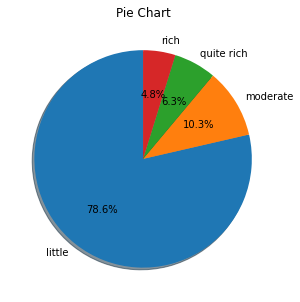

little        786
moderate      103
quite rich     63
rich           48
Name: Saving_accounts, dtype: int64


In [333]:
# Counting total numbers in each category
count = data['Saving_accounts'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
skills = ['little', 'moderate', 'quite rich','rich']
# Creating plot
fig = plt.figure(figsize =(8, 5))
# Show plot
plt.pie(count, labels = skills, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Pie Chart")
plt.show()
print(count)

Most people that applied for a credit loan are poor

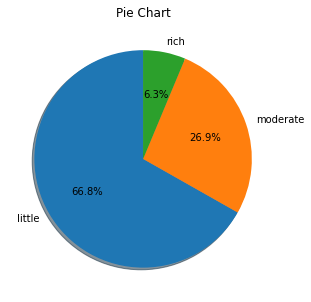

little      668
moderate    269
rich         63
Name: Checking_account, dtype: int64


In [337]:
# Counting total numbers in each category
count = data['Checking_account'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
skills = ['little', 'moderate','rich']
# Creating plot
fig = plt.figure(figsize =(8, 5))
# Show plot
plt.pie(count, labels=skills, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Pie Chart")
plt.show()
print(count)

Most people that applied for a credit loan are poor

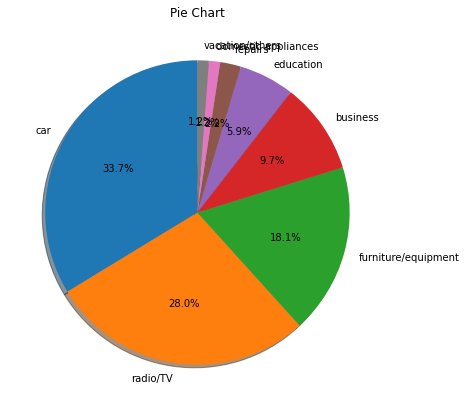

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64


In [345]:
# Counting total numbers in each category
count = data['Purpose'].value_counts()
# Checking the numbers
count
# Creating categories based on numbers
skills = ['car', 'radio/TV', 'furniture/equipment', 'business', 
          'education','repairs','domestic appliances','vacation/others']
# Creating plot
fig = plt.figure(figsize =(10, 7))
# Show plot
plt.pie(count, labels=skills, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Pie Chart")
plt.show()
print(count)

Most people that applied for a credit loan for buying cars

**Bivariate Plotting:**

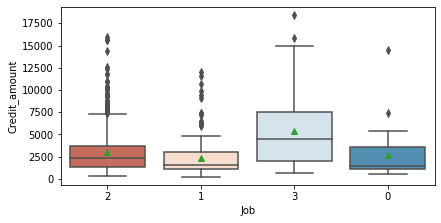

In [283]:
sns.boxplot(x='Job', y='Credit_amount', 
                   data=data, palette="RdBu", showmeans=True)# boxplot for credit amount and job

The people with 3 jobs have high credit amount. And have some outliers

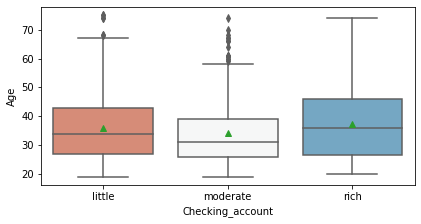

In [285]:
sns.boxplot(x='Checking_account', y='Age', 
                   data=data, palette="RdBu", showmeans=True) #boxplot for checking account and age

We have very less moderate people with the age of 25s-40s

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

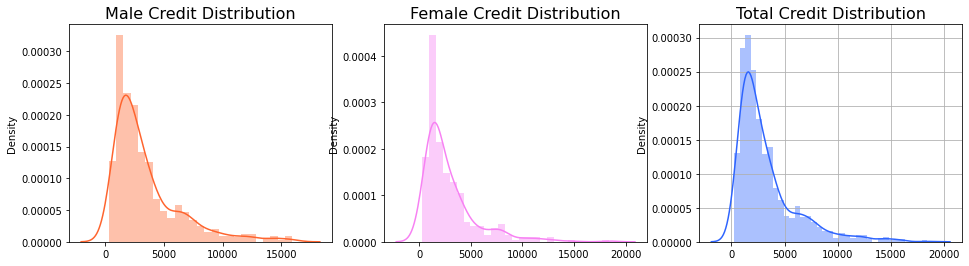

In [242]:
male_credit = data["Credit_amount"].loc[data["Sex"] == "male"].values # Getting male credit value
female_credit = data["Credit_amount"].loc[data["Sex"] == "female"].values # Getting female credit value
total_credit = data['Credit_amount'].values # Getting total credit value

fig, ax = plt.subplots(1, 3, figsize=(16,4)) # to draw subplots 

sns.distplot(male_credit, ax=ax[0], color="#FE642E") # distribution plot to show the male credit 
ax[0].set_title("Male Credit Distribution", fontsize=16) 
sns.distplot(female_credit, ax=ax[1], color="#F781F3") # distribution plot to show the female credit 
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE") # distribution plot to show the total credit 
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.grid()
plt.show()

Male credit distibution is very high. So here we can say that males are took more lonas than female.

In [266]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
data["Purpose"].unique()
sex_purpose = pd.crosstab(data['Purpose'], data['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


Females were more likely to apply for a credit loan tobuy furniture and equipment. (10% more than males)

Males applied 2x more than females for a credit loan to invest in a business.

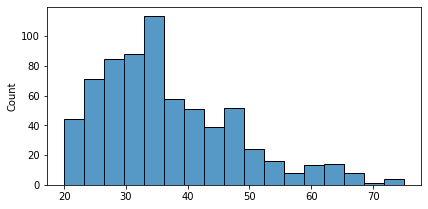

In [267]:
male_age = data['Age'].loc[data['Sex'] == 'male'].values.tolist()
sns.histplot(male_age)

Most of the males that applied for a loan ranged from their 20s-40s


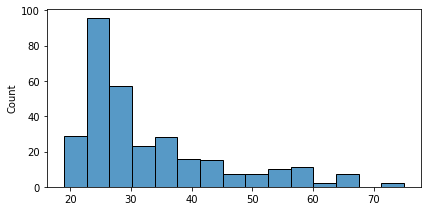

In [268]:
female_age = data['Age'].loc[data['Sex'] == 'female'].values.tolist()
sns.histplot(female_age)

Most females that applied for a credit loan were less than 30 .

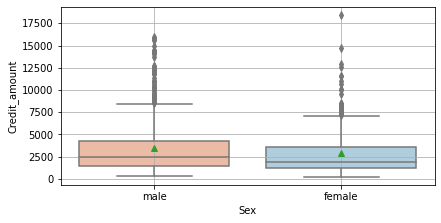

In [244]:
rcParams['figure.figsize'] = 6.7,3.27 # we can fix the size of the figure
sns.boxplot(x='Sex', y='Credit_amount', 
                   data=data, palette="RdBu", showmeans=True)
plt.grid()
plt.show()

Male spending more compare to female

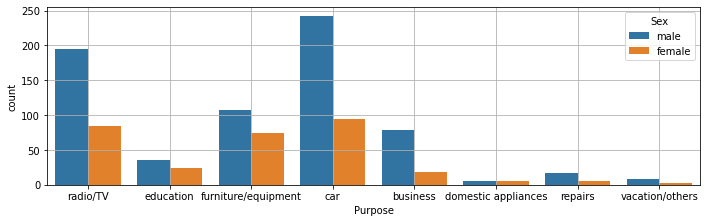

In [245]:
rcParams['figure.figsize'] = 11.7,3.27 # we can fix the size of the figure
sns.countplot(x ='Purpose', hue = "Sex", data = data) # Examining the relationship between purpose and sex
plt.grid()
plt.show()

Male spent more money(took loans) to bought cards

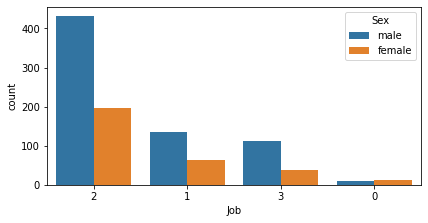

In [246]:
rcParams['figure.figsize'] = 6.7,3.27 # we can fix the size of the figure
sns.countplot(x ='Job', hue = "Sex", data = data) # Examining the relationship between Job and sex

The people who took loans are male and skilled people.

In [271]:
data["Sex"].unique()
sex_purpose = pd.crosstab(data['Sex'], data['Job']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Job,0,1,2,3
Sex,,,,
female,54.545455,32.0,31.269841,25.0
male,45.454545,68.0,68.730159,75.0


2x of females were unemployed compared to males.

2x of males worked 3 jobs compared to females.


**Multivariate Plotting**

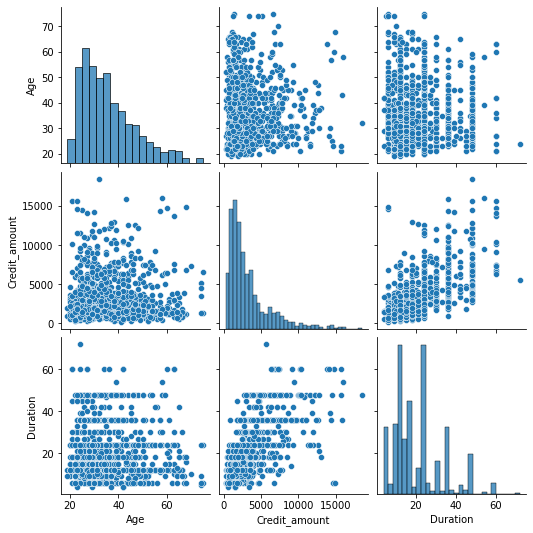

In [247]:
sns.pairplot(data)
plt.show()

3. Conduct the following steps only as necessary along with the reason behind doing it with suitable steps;

  1.   Missing values
  2.   Erroneous/wrong values
  3.   Skewed data and outliers







In our dataset we don't have any missing values like .(dot), /, # , etc,. So no need to perform any operations.

We don't have any wrong values so need not do any thing.

For 3rd one I already see the distribution, outliers of each column in the 2nd question. 

4. How many highly skilled men (below 35 years) are staying in their own house?

In [346]:
highly_skilled = data[(data['Age']  < 35) & (data['Sex'] == 'male') & (data['Housing'] == 'own') & (data['Job'] == data.Job.max())]
highly_skilled.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
9,28,male,3,own,little,moderate,5234,30,car
40,30,male,3,own,quite rich,little,2333,30,radio/TV
51,30,male,3,own,little,moderate,5965,27,car
88,30,male,3,own,moderate,little,2249,18,car
128,34,male,3,own,little,moderate,1860,12,car


This is another solution for the above problem
we can use catplot() 

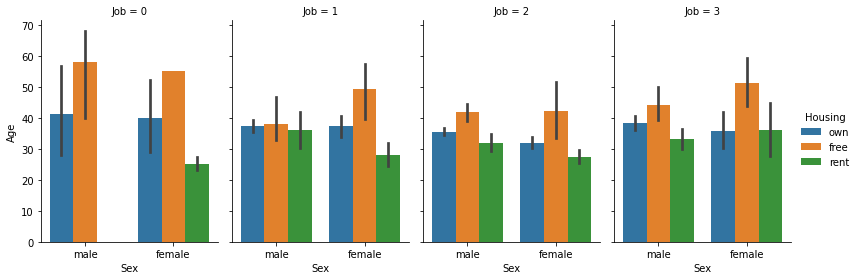

In [295]:
g = sns.catplot(x="Sex", y="Age",
                hue="Housing", col="Job",
                data=data, kind="bar",
                height=4, aspect=.7);

5. Visualize men and females separately for their social status.

Here to finding the satatus of the male and female i'm using the savings_account to see their status.

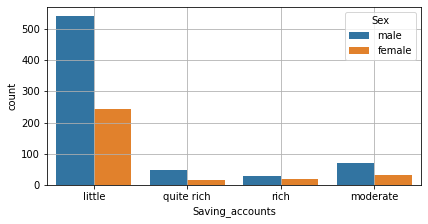

In [348]:
rcParams['figure.figsize'] = 6.7,3.27 # we can fix the size of the figure
sns.countplot(x ='Saving_accounts', hue = 'Sex', data = data) # Examining the relationship between eduacation and gender
plt.grid()
plt.show()

By looking at the above grpah we can say that

The more people who took the loan are poor men.

We have only very less rich men.

